# Unicef Malnutrition Analysis

## I. Import the Data

In [ ]:
# Import necessary packages

# Basic packages
import pandas as pd  # For handling dataframes
import numpy as np  # For numerical calculations
import scipy as sp  # For scientific computing

# Graphing
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualization
from scipy.interpolate import interp1d  # For interpolation
from seaborn import heatmap  # For generating heatmaps

# Avoid displaying warning messages
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load The Data
The code loads several datasets from CSV files located in Google Drive using Pandas:

1. `wasted_data`: Contains data on wasting.
2. `ser_wasted_data`: Contains data on severe wasting.
3. `overweight_data`: Contains data on overweight.
4. `stunted_data`: Contains data on stunting.
5. `ser_stunted_data`: Contains data on severe stunting.

Each dataset is loaded using `pd.read_csv()` function with the corresponding file path. Then, a sample of each dataset is displayed using the `display()` function.


In [ ]:
wasted_data = pd.read_csv('/content/drive/MyDrive/Data/Wasted_Data.csv')
ser_wasted_data = pd.read_csv('/content/drive/MyDrive/Data/Severe_Wasted_Data.csv')
overweight_data = pd.read_csv('/content/drive/MyDrive/Data/Overweight_Data.csv')
stunted_data = pd.read_csv('/content/drive/MyDrive/Data/Stunt_Data.csv')
ser_stunted_data = pd.read_csv('/content/drive/MyDrive/Data/Severe_Stunt_Data.csv')

display(wasted_data[:3])
display(ser_wasted_data[:1])
display(overweight_data[:1])
display(stunted_data[:1])
display(ser_stunted_data[:1])

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wast...,F: Female,2004,9.3,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wast...,F: Female,2013,8.7,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,2080089.9,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan National Nutrition Survey 2013,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wast...,F: Female,2018,4.1,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9593.1,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE3: Weight-for-height <-3 SD (seve...,F: Female,2004,4.3,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_PO2: Weight-for-height >+2 SD (over...,F: Female,2004,2.6,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2004,58.5,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,F: Female,2004,30.9,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old


## II. Data Cleaning

We have a list of dataframes `newDfs` containing different datasets: wasted_data, ser_wasted_data, stunted_data, ser_stunted_data, and overweight_data. The objective is to rename columns and keep only relevant data columns.

We define a list `newDfs` containing new names for the columns.

Next, we iterate through each dataframe in the list `newDfs`:
- We rename specific columns using the `rename()` function, mapping old column names to new ones.
- Then, we select only the relevant columns ('Country', 'Sex', 'Year', renamed column, 'Age') using indexing.

Finally, we display a sample of columns from the first dataframe in the list `newDfs` to verify that the renaming was successful.


In [ ]:
# List of dataframes to rename columns and keep only relevant data columns
newDfs = [wasted_data, ser_wasted_data, stunted_data, ser_stunted_data, overweight_data]

# New names for the columns
rename_names = ['Waste_percent', 'Severe_Waste_percent', 'Stunt_percent', 'Severe_Stunt_percent', 'Overweight_percent']

# Loop through each dataframe and rename columns, then keep only relevant columns
for i in range(len(newDfs)):
    newDfs[i] = newDfs[i].rename(columns={"REF_AREA:Geographic area": "Country",
                                                  "SEX:Sex": "Sex",
                                                  "TIME_PERIOD:Time period": "Year",
                                                  "OBS_VALUE:Observation Value": rename_names[i],
                                                  'AGE:Current age': 'Age'})
    newDfs[i] = newDfs[i][['Country', 'Sex', 'Year', rename_names[i], 'Age']]

# Displaying sample of dataframe columns to ensure successful renaming
display(newDfs[0].columns)


Index(['Country', 'Sex', 'Year', 'Waste_percent', 'Age'], dtype='object')

In [ ]:
# showing a sample of dataframes to make sure the names are succesfully changed
wasted_df=newDfs[0]
ser_wasted_df=newDfs[1]
stunted_df=newDfs[2]
ser_stunted_df=newDfs[3]
overweight_df=newDfs[4]

In [ ]:
# Combine dataframes on columns except the malnutrition percents
combine_cols=newDfs[0].columns.tolist()
# shown sample lines
combine_cols.pop(3)
combined_df=wasted_df.merge(ser_wasted_df,how='outer',on=combine_cols)\
            .merge(stunted_df,how='outer',on=combine_cols)\
            .merge(ser_stunted_df,how='outer',on=combine_cols)\
            .merge(overweight_df,how='outer',on=combine_cols)
combined_df.head(3)

,Country,Sex,Year,Waste_percent,Age,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent
0,AFG: Afghanistan,F: Female,2004,9.3,Y0T4: Under 5 years old,4.3,58.5,30.9,2.6
1,AFG: Afghanistan,F: Female,2013,8.7,Y0T4: Under 5 years old,3.5,39.5,19.9,5.8
2,AFG: Afghanistan,F: Female,2018,4.1,Y0T4: Under 5 years old,1.4,38.1,20.0,4.2


In [ ]:
# Calculate total waste percent column from adding percentage with normal waste condition and percentage with severe waste condition
combined_df['Waste_total_percent']=combined_df['Waste_percent']+combined_df['Severe_Waste_percent']
combined_df['Stunt_total_percent']=combined_df['Stunt_percent']+combined_df['Severe_Stunt_percent']
combined_df.head(1)

,Country,Sex,Year,Waste_percent,Age,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent,Waste_total_percent,Stunt_total_percent
0,AFG: Afghanistan,F: Female,2004,9.3,Y0T4: Under 5 years old,4.3,58.5,30.9,2.6,13.6,89.4


In [ ]:
# pop the previous waste & stunt columns, only keep the "waste total" and "stunt total" column
cols=['Waste_percent','Severe_Waste_percent','Stunt_percent','Severe_Stunt_percent']
for c in cols:
    combined_df.pop(c)
combined_df.head(1)

,Country,Sex,Year,Age,Overweight_percent,Waste_total_percent,Stunt_total_percent
0,AFG: Afghanistan,F: Female,2004,Y0T4: Under 5 years old,2.6,13.6,89.4


In [ ]:
# save the column names for future uses
mal_type=['Mean','Overweight_percent','Waste_total_percent','Stunt_total_percent']

Now let's observe the properties of columns of our cleaned new combined dataframe.

In [ ]:
# 1. Make sure the age is all same.
print('All data are for kids under 5 years old as indentified by value', combined_df['Age'].unique())

All data are for kids under 5 years old as indentified by value ['Y0T4: Under 5 years old']


In [ ]:
# Since the data only for kids under 5, we can delete this column.
del combined_df['Age']

In [ ]:
# # 2. Format sex column
# print('The "sex" column contains several values', combined_df['Sex'].unique())
# combined_df['Sex'] = combined_df['Sex'].replace({'F: Female': 1, 'M: Male': 0, '_T: Total': 999})

In [ ]:
# only leave the "Total" for analysis
combined_df['Sex'] = combined_df['Sex'].str[1]
combined_df=combined_df[combined_df['Sex']=='T']
print('Filtered out the gender-specific values and left the', combined_df['Sex'].unique(), 'values for analysis.')
# Since the data now contains only total gender values, we can delete this column.
del combined_df['Sex']



Filtered out the gender-specific values and left the ['T'] values for analysis.


In [ ]:
# 3. Format countries and regions
country_count=len(combined_df['Country'].unique())
print('There are a total number of '+ str(country_count) + ' countries/regions in the DataFrame initially.')

There are a total number of 239 countries/regions in the DataFrame initially.


In [ ]:
# Format countries, separate to 3 digit ISO code and name
split_countries= combined_df["Country"].str.split(':', expand=True)

# join to combine df
combined_df = split_countries.join(combined_df)

# rename columns
combined_df = combined_df.rename(columns = {0 : "ISO Code", 1 : "Country Name"})

# format the region
combined_df["Country Name"] = combined_df["Country Name"].str.strip()

# filter only the countries not regions
combined_df = combined_df[combined_df["ISO Code"].str.contains("_")==False]

# remove previous columns
del combined_df['Country']

combined_df.head(3)

print(len(combined_df))

966


In [ ]:
new_country_count=len(combined_df['Country Name'].unique())
print('There are a total number of '+ str(new_country_count) + ' countries in the DataFrame now.')

There are a total number of 157 countries in the DataFrame now.


Its important to note that there are 195 countries in the world indicating that certain countries are missing from this dataset. The data from these missing countries may significantly alter the course of the analysis but we continue our analysis on the dataset as is.

In [ ]:
# 4. Observe the Year columns
combined_df['Year'].unique()

array(['1997', '2004', '2013', '2018', '2000', '2005', '2009', '2017',
       '1987', '1992', '1995', '2002', '2006', '2012', '2019', '1996',
       '2007', '2015', '1994', '1998', '2010', '2016', '2001', '2011',
       '1989', '1986', '1990', '1991', '1993', '1999', '2003',
       '2013-02-16', '2013-06-16', '2014', '2008', '1985', '2019-03-14',
       '2019-11-07', '2019-08-12', '2019-08-27', '1988', '1998-01-01',
       '1998-12-01', '2018-03-13', '2018-04-09', '2020', '2012-01-06',
       '2012-08-06', '2019-01-15', '2019-09-15', '1994-01-15',
       '1994-12-17', '2016-01-15', '2016-05-11', '2016-12-01',
       '2015-05-22', '2015-09-05', '2018-07-24', '2018-09-27',
       '2010-08-22', '2010-10-24', '2016-05-15', '2016-10-01',
       '2006-03-28', '2006-11-01', '2010-06-05', '2010-10-29',
       '2012-04-11', '2012-07-16', '2018-04-02', '2018-10-23', '1983',
       '2015-01-09', '2015-04-26', '2019-02-09', '2019-08-16',
       '2017-07-01', '2017-09-19', '2010-10-04', '2010-12-21

Observe some data is recored per date instead of per year, and we only want to keep the dataframe one row per year, so we need to format the Year and keep the average of all percentages if there is more than one year appeared for each country.

In [ ]:
print("Years: " , combined_df['Year'].unique())

combined_df["Year"] =  pd.to_datetime(combined_df["Year"]).dt.year
combined_df=combined_df.groupby(['ISO Code','Country Name','Year'],as_index=False).mean()
display(combined_df[:3])

#observe year ranges
years=combined_df['Year'].unique()
print(sorted(years))

Years:  ['1997' '2004' '2013' '2018' '2000' '2005' '2009' '2017' '1987' '1992'
 '1995' '2002' '2006' '2012' '2019' '1996' '2007' '2015' '1994' '1998'
 '2010' '2016' '2001' '2011' '1989' '1986' '1990' '1991' '1993' '1999'
 '2003' '2013-02-16' '2013-06-16' '2014' '2008' '1985' '2019-03-14'
 '2019-11-07' '2019-08-12' '2019-08-27' '1988' '1998-01-01' '1998-12-01'
 '2018-03-13' '2018-04-09' '2020' '2012-01-06' '2012-08-06' '2019-01-15'
 '2019-09-15' '1994-01-15' '1994-12-17' '2016-01-15' '2016-05-11'
 '2016-12-01' '2015-05-22' '2015-09-05' '2018-07-24' '2018-09-27'
 '2010-08-22' '2010-10-24' '2016-05-15' '2016-10-01' '2006-03-28'
 '2006-11-01' '2010-06-05' '2010-10-29' '2012-04-11' '2012-07-16'
 '2018-04-02' '2018-10-23' '1983' '2015-01-09' '2015-04-26' '2019-02-09'
 '2019-08-16' '2017-07-01' '2017-09-19' '2010-10-04' '2010-12-21']


,ISO Code,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent
0,AFG,Afghanistan,1997,6.5,NaN,NaN
1,AFG,Afghanistan,2004,4.6,12.1,91.1
2,AFG,Afghanistan,2013,5.3,13.5,60.8


[1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [ ]:
#observe year ranges
years=combined_df['Year'].unique()
print(sorted(years))

[1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [ ]:
# 5. Now our dataframe is cleaned and we are ready to drop rows with Na values
combined_df.dropna(inplace=True) #drop NaN

In [ ]:
# Selecting the columns for calculation
selected_columns = combined_df[['Waste_total_percent', 'Stunt_total_percent']]

# Calculating the mean along the rows
combined_df['Mean'] = selected_columns.mean(axis=1)

# Displaying the first 3 rows of the DataFrame to verify the changes
print(combined_df.head(3))

# Printing the length of the DataFrame
print(len(combined_df))

  ISO Code Country Name  Year  Overweight_percent  Waste_total_percent  \
1      AFG  Afghanistan  2004                 4.6                 12.1   
2      AFG  Afghanistan  2013                 5.3                 13.5   
3      AFG  Afghanistan  2018                 4.1                  6.7   

   Stunt_total_percent   Mean  
1                 91.1  51.60  
2                 60.8  37.15  
3                 57.6  32.15  
688


Its important to note here that the calculated mean of the various malnutrition conditions may not be the most ideal representation of each country during that year but we've chosen this method as a relatively high level status of the country.

## III. Global Malnutrition Visulization

### 1. Histograms

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Mean Malnutrition", "Overweight", "Waste", "Stunt"))

# Add histograms to the subplots
fig.add_trace(go.Histogram(x=combined_df[mal_type[0]], marker=dict(color='deepskyblue', opacity=0.5), name='Mean Malnutrition'), row=1, col=1)
fig.add_trace(go.Histogram(x=combined_df[mal_type[1]], marker=dict(color='royalblue', opacity=0.5), name='Overweight'), row=1, col=2)
fig.add_trace(go.Histogram(x=combined_df[mal_type[2]], marker=dict(color='orange', opacity=0.5), name='Waste'), row=2, col=1)
fig.add_trace(go.Histogram(x=combined_df[mal_type[3]], marker=dict(color='forestgreen', opacity=0.5), name='Stunt'), row=2, col=2)

# Update layout
fig.update_layout(title="World's Children Malnutrition Histogram", height=800, width=800, showlegend=False)

# Update axis labels
fig.update_xaxes(title_text='Percentage', row=1, col=1)
fig.update_xaxes(title_text='Percentage', row=1, col=2)
fig.update_xaxes(title_text='Percentage', row=2, col=1)
fig.update_xaxes(title_text='Percentage', row=2, col=2)

fig.update_yaxes(title_text='Number of Countries', row=1, col=1)
fig.update_yaxes(title_text='Number of Countries', row=1, col=2)
fig.update_yaxes(title_text='Number of Countries', row=2, col=1)
fig.update_yaxes(title_text='Number of Countries', row=2, col=2)

# Show plot
fig.show()


In [ ]:
# Create traces for each malnutrition type
trace_mean = go.Histogram(x=combined_df[mal_type[0]], marker=dict(color='deepskyblue', opacity=0.5), name='Mean Malnutrition')
trace_overweight = go.Histogram(x=combined_df[mal_type[1]], marker=dict(color='royalblue', opacity=0.5), name='Overweight')
trace_waste = go.Histogram(x=combined_df[mal_type[2]], marker=dict(color='orange', opacity=0.5), name='Waste')
trace_stunt = go.Histogram(x=combined_df[mal_type[3]], marker=dict(color='forestgreen', opacity=0.5), name='Stunt')

# Create layout
layout = go.Layout(
    title="Combined Global Malnutrition Analysis Histogram",
    xaxis=dict(title='Percentage', titlefont=dict(size=14)),
    yaxis=dict(title='Number of countries', titlefont=dict(size=14)),
    bargap=0.2,
    bargroupgap=0.1
)

# Create figure and add traces
fig = go.Figure(data=[trace_mean, trace_overweight, trace_waste, trace_stunt], layout=layout)

# Show plot
fig.show()


### 2. Boxplots<a class="anchor" id="boxplot"></a>

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Mean Malnutrition", "Overweight", "Waste", "Stunt"))

# Add boxplots to the subplots
fig.add_trace(go.Box(y=combined_df[mal_type[0]], name='Mean Malnutrition'), row=1, col=1)
fig.add_trace(go.Box(y=combined_df[mal_type[1]], name='Overweight'), row=1, col=2)
fig.add_trace(go.Box(y=combined_df[mal_type[2]], name='Waste'), row=2, col=1)
fig.add_trace(go.Box(y=combined_df[mal_type[3]], name='Stunt'), row=2, col=2)

# Update layout
fig.update_layout(title="World's Children Malnutrition Boxplot", height=800, width=1000)

# Update axis labels
fig.update_xaxes(title_text='Malnutrition Type', row=1, col=1)
fig.update_xaxes(title_text='Malnutrition Type', row=1, col=2)
fig.update_xaxes(title_text='Malnutrition Type', row=2, col=1)
fig.update_xaxes(title_text='Malnutrition Type', row=2, col=2)

fig.update_yaxes(title_text='Percentage', row=1, col=1)
fig.update_yaxes(title_text='Percentage', row=1, col=2)
fig.update_yaxes(title_text='Percentage', row=2, col=1)
fig.update_yaxes(title_text='Percentage', row=2, col=2)

# Show plot
fig.show()


### 3. Heatmap <a class="anchor" id="heatmap"></a>

In [ ]:
# Calculate correlation matrix
corr = combined_df.corr()

# Define heatmap
heatmap = go.Heatmap(z=corr.values,
                     x=corr.index.values,
                     y=corr.columns.values,
                     colorscale='Blues',
                     colorbar=dict(title='Correlation'),
                     zmin=-1, zmax=1)

# Add text annotations
annotations = []
for i, row in enumerate(corr.index):
    for j, col in enumerate(corr.columns):
        annotations.append(dict(x=col, y=row, text=str(round(corr.iloc[i, j], 2)),
                                font=dict(color='white' if corr.iloc[i, j] > 0.5 else 'black'),
                                showarrow=False))

# Create layout
layout = go.Layout(
    title='Correlation heatmap for all malnutrition types',
    titlefont=dict(size=20),
    xaxis=dict(title='Malnutrition Types'),
    yaxis=dict(title='Malnutrition Types'),
    annotations=annotations,
    height=900,
    width=900
)

# Create figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show plot
fig.show()


The heatmap illustrated above presents the following insights:

1. There exists a clear linear relationship between the Mean and the Stunt percentage, indicating a significant global malnutrition issue related to stunting.

2. Notably, a negative correlation is observed between overweight and both stunting and wasting. This implies that the factors contributing to stunting and wasting differ from those contributing to overweight conditions.

3. The negative correlation between the years and each malnutrition condition suggests a decline in the percentage of malnutrition globally over time. This indicates an overall improvement in the world's nutritional status over the years.


Using interpolation to smooth the linear graph above so we will able to to view more continuous and time-based trends.

In [ ]:
def countryGraph(countryISO):
    country_df = combined_df.copy()
    # country_df = country_df[country_df["Sex"] == 999]
    countryData = country_df.loc[country_df['ISO Code'] == countryISO]
    country_name = countryData.iloc[0]['Country Name']  # Access the first row and 'Country Name' column
    print(country_name)
    x = countryData['Year']  # x is the year
    X_ = np.linspace(x.min(), x.max(), 300)  # X_ is the new x with linspace
    d = countryData[mal_type[1:]]  # z is actual datapoints

    # Initialize traces list
    traces = []

    # Iterate over malnutrition types
    for i in range(1, 4):
        y = countryData[mal_type[i]]  # iterate the plot each y as malnutrition types

        # Add original data points trace
        traces.append(go.Scatter(x=x, y=y, mode='markers', name=mal_type[i] + ' (Original)', marker=dict(color='red')))

        # Add linear line connecting original data points
        traces.append(go.Scatter(x=x, y=y, mode='lines', name=mal_type[i] + ' (Linear)', line=dict(color='yellow', dash='dash')))

        # Smooth with interpolation
        smooth_model = interp1d(x, y, kind="cubic")
        f = smooth_model(X_)  # f is the new y

        # Add smoothed data trace
        traces.append(go.Scatter(x=X_, y=f, mode='lines', name=mal_type[i] + ' (Smoothed)'))

    # Create layout
    layout = go.Layout(
        title=country_name + ' Children Malnutrition Chart',
        titlefont=dict(size=20),
        xaxis=dict(title='Year', titlefont=dict(size=14)),
        yaxis=dict(title='Percentage', titlefont=dict(size=14)),
        legend=dict(x=1, y=0.5),
        height=600,
        width=1000
    )

    # Create figure
    fig = go.Figure(data=traces, layout=layout)

    # Show plot
    fig.show()

# Let's observe US data again now.
countryGraph('USA')


United States


### 4. K Means Clustering Analysis

Observed that children under 5 in US have a relative high overweight problem, lower stunt problem, and the lowest waste problem.

In [ ]:
def kmeans_clustering(combined_df, start_year, end_year):
    # Filter data based on the specified year range
    filtered_df = combined_df[(combined_df['Year'] >= start_year) & (combined_df['Year'] <= end_year)]

    # Group by country and calculate the means
    country_means_df = filtered_df.groupby('Country Name').mean().reset_index()

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(country_means_df[['Overweight_percent', 'Waste_total_percent', 'Stunt_total_percent']])

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(scaled_data)

    # Get cluster assignments
    labels = kmeans.labels_

    # Add cluster labels to the DataFrame
    country_means_df['Cluster'] = labels

    # Plot the data using Plotly
    fig = px.scatter(country_means_df, x='Stunt_total_percent', y='Waste_total_percent', color='Cluster',
                     title=f'K-Means Clustering of Countries ({start_year}-{end_year})',
                     labels={'Waste_total_percent': 'Waste Percentage', 'Stunt_total_percent': 'Stunt Percentage'},
                     template='plotly_white', hover_name='Country Name')
    fig.update_layout(title=f"K-Means Clustering of Countries ({start_year}-{end_year})", height=800, width=800)
    fig.show()

# Call the function for different year ranges
kmeans_clustering(combined_df, 1990, 1995)
kmeans_clustering(combined_df, 1995, 2001)
kmeans_clustering(combined_df, 2000, 2005)
kmeans_clustering(combined_df, 2006, 2010)
kmeans_clustering(combined_df, 2011, 2015)
kmeans_clustering(combined_df, 2016, 2021)

kmeans_clustering(combined_df, combined_df['Year'].min(), combined_df['Year'].max())  # For all years


### 5. TOP 5 countries with the Least and Most malnutrition graphs

Let's groupby countries and observe the top 5 and bottom 5 countries with the highest and lowest overall mean malnutrition values. Because the minimum required datapoint of cubic spline is 4, we want to filter the country with 4 or more years of report.


In [ ]:
country_count_all=combined_df.groupby(by=['ISO Code','Country Name'],as_index=False).count()
country_count_all.rename(columns={'Mean':'Count'},inplace=True)
country_count_all=country_count_all[['ISO Code','Count']]

# filter country with >= 4 data points
country_count=country_count_all[country_count_all['Count']>=4]
country_count=country_count[['ISO Code','Count']]

# this is all countries
print('There are '+str(len(country_count_all))+' countries total.')

# this is all countries with 4+ data points
print('There are '+str(len(country_count))+' countries with 4+ data points.')


There are 147 countries total.
There are 86 countries with 4+ data points.


In [ ]:
# now we are creating a country_rank dataframe to observe countries with 4+ data points in the rank of their malnutrition means.
country_rank=combined_df.groupby(by=['ISO Code','Country Name'],as_index=False).mean()
country_rank=country_rank.merge(country_count,how='inner',on='ISO Code')
country_rank=country_rank.sort_values(by='Mean')
country_rank["Year"]=country_rank["Year"].astype(int)
display(country_rank[:3])


,ISO Code,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean,Count
80,USA,United States,2007,8.109091,0.481818,3.300000,1.890909,11
36,KWT,Kuwait,2007,8.328571,3.178571,5.807143,4.492857,14
45,MKD,North Macedonia,2008,12.350000,3.175000,9.525000,6.350000,4


In [ ]:
clean=country_rank.groupby(["Country Name", "Year"],as_index = False).mean()
iso_codes = combined_df[["ISO Code", "Country Name"]].drop_duplicates()
clean_rank = iso_codes.merge(clean, on = "Country Name")
clean_rank = clean_rank.sort_values(by = ["Mean"], ascending = True)
display(clean_rank[:3])

,ISO Code,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean,Count
80,USA,United States,2007,8.109091,0.481818,3.300000,1.890909,11.0
36,KWT,Kuwait,2007,8.328571,3.178571,5.807143,4.492857,14.0
45,MKD,North Macedonia,2008,12.350000,3.175000,9.525000,6.350000,4.0


In [ ]:
# Save the 5 countries with lowest malnutrition mean for observation, save as top5
top5=clean_rank[:5]['Country Name'].tolist()
display(top5)
# The 5 countries with least amount of children malnutrition problem

['United States', 'Kuwait', 'North Macedonia', 'Serbia', 'Uruguay']

In [ ]:
# Save these 5 countries' corresponding ISO code as top5ISO
top5ISO=clean_rank[:5]['ISO Code'].tolist()
display(top5ISO)


['USA', 'KWT', 'MKD', 'SRB', 'URY']

In [ ]:
# Plot graphs to observe the trend for each malnutrition problem at country level for top 5 countries
for i in top5ISO:
    countryGraph(i)


United States


Kuwait


North Macedonia


Serbia


Uruguay


From the graphs above we observed that the biggest malnutrition problem in top 5 countries is overweight, and it ranges from 10% to 20%, and the smallest problem is waste which ranges less than 5%.

In [ ]:
# Now ave the 5 countries with most amount malnutrition mean for observation, save as bot5
bot5=clean_rank[-5:]['Country Name'].tolist()
display(bot5)


['Niger', 'Madagascar', 'Burundi', 'Yemen', 'Timor-Leste']

In [ ]:
# Save these 5 countries' corresponding ISO code as bot5ISO
bot5ISO=clean_rank[-5:]['ISO Code'].tolist()
display(bot5ISO)


['NER', 'MDG', 'BDI', 'YEM', 'TLS']

In [ ]:
# Plot graphs to observe the trend for each malnutrition problem at country level for top 5 countries
for i in bot5ISO:
    countryGraph(i)


Niger


Madagascar


Burundi


Yemen


Timor-Leste


From the graphs above we observed that the biggest malnutrition problem in bottom 5 countries is stunting, and it ranges from 60% to 100% of the children under 5 population, and the smallest problem is overweight which ranges less than around 8%.

### 6. PCA  Analysis

Due to the numerous countries present in this analysis, visually observing the 3 main data factors (overweight, stunting and wasting) can provide valuable insight. In this PCA compression component, we attempt to compress this data into 2 dimensions to observe whether certain countries stand out from the others.

In [ ]:
new_analysis = combined_df.groupby(["Country Name"]).mean()

new_analysis = new_analysis.T # transposing data table

new_analysis = new_analysis.drop(["Year"], axis = 0)
new_analysis = new_analysis.drop(["Mean"], axis = 0)
new_analysis['Malnutrition Factor'] = new_analysis.index
new_analysis.reset_index(drop=True, inplace=True)
new_analysis.insert(0, 'Malnutrition Factor', new_analysis.pop("Malnutrition Factor")) # bringing key column of malnutrition factors to the front
display(new_analysis)

Country Name,Malnutrition Factor,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Azerbaijan,Bangladesh,Barbados,...,Ukraine,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Vanuatu,Viet Nam,Yemen,Zambia,Zimbabwe
0,Overweight_percent,4.666667,23.625,12.828571,2.55,9.9,13.62,11.150,1.722222,12.2,...,26.5,4.445455,8.109091,10.26,9.266667,4.80,3.48750,4.500000,7.228571,5.7125
1,Waste_total_percent,10.766667,11.750,8.285714,7.75,1.4,5.54,8.975,17.500000,8.8,...,12.0,6.554545,0.481818,2.08,7.000000,7.00,10.56875,20.200000,7.585714,5.3750
2,Stunt_total_percent,69.833333,38.550,25.728571,74.40,10.0,22.08,30.975,59.711111,10.8,...,35.6,57.345455,3.300000,13.10,25.233333,36.75,45.64375,80.666667,68.957143,41.2250


In [ ]:
countries = new_analysis.columns.to_list()
countries.remove("Malnutrition Factor")

factors = new_analysis["Malnutrition Factor"]

In [ ]:
X_raw = new_analysis[countries].values.T #creating a matrix of important values

s = min(X_raw.shape)

X = X_raw - np.mean(X_raw, axis=0)

U, Sigma, VT = np.linalg.svd(X, full_matrices=False) # using SVD linear algebra function to


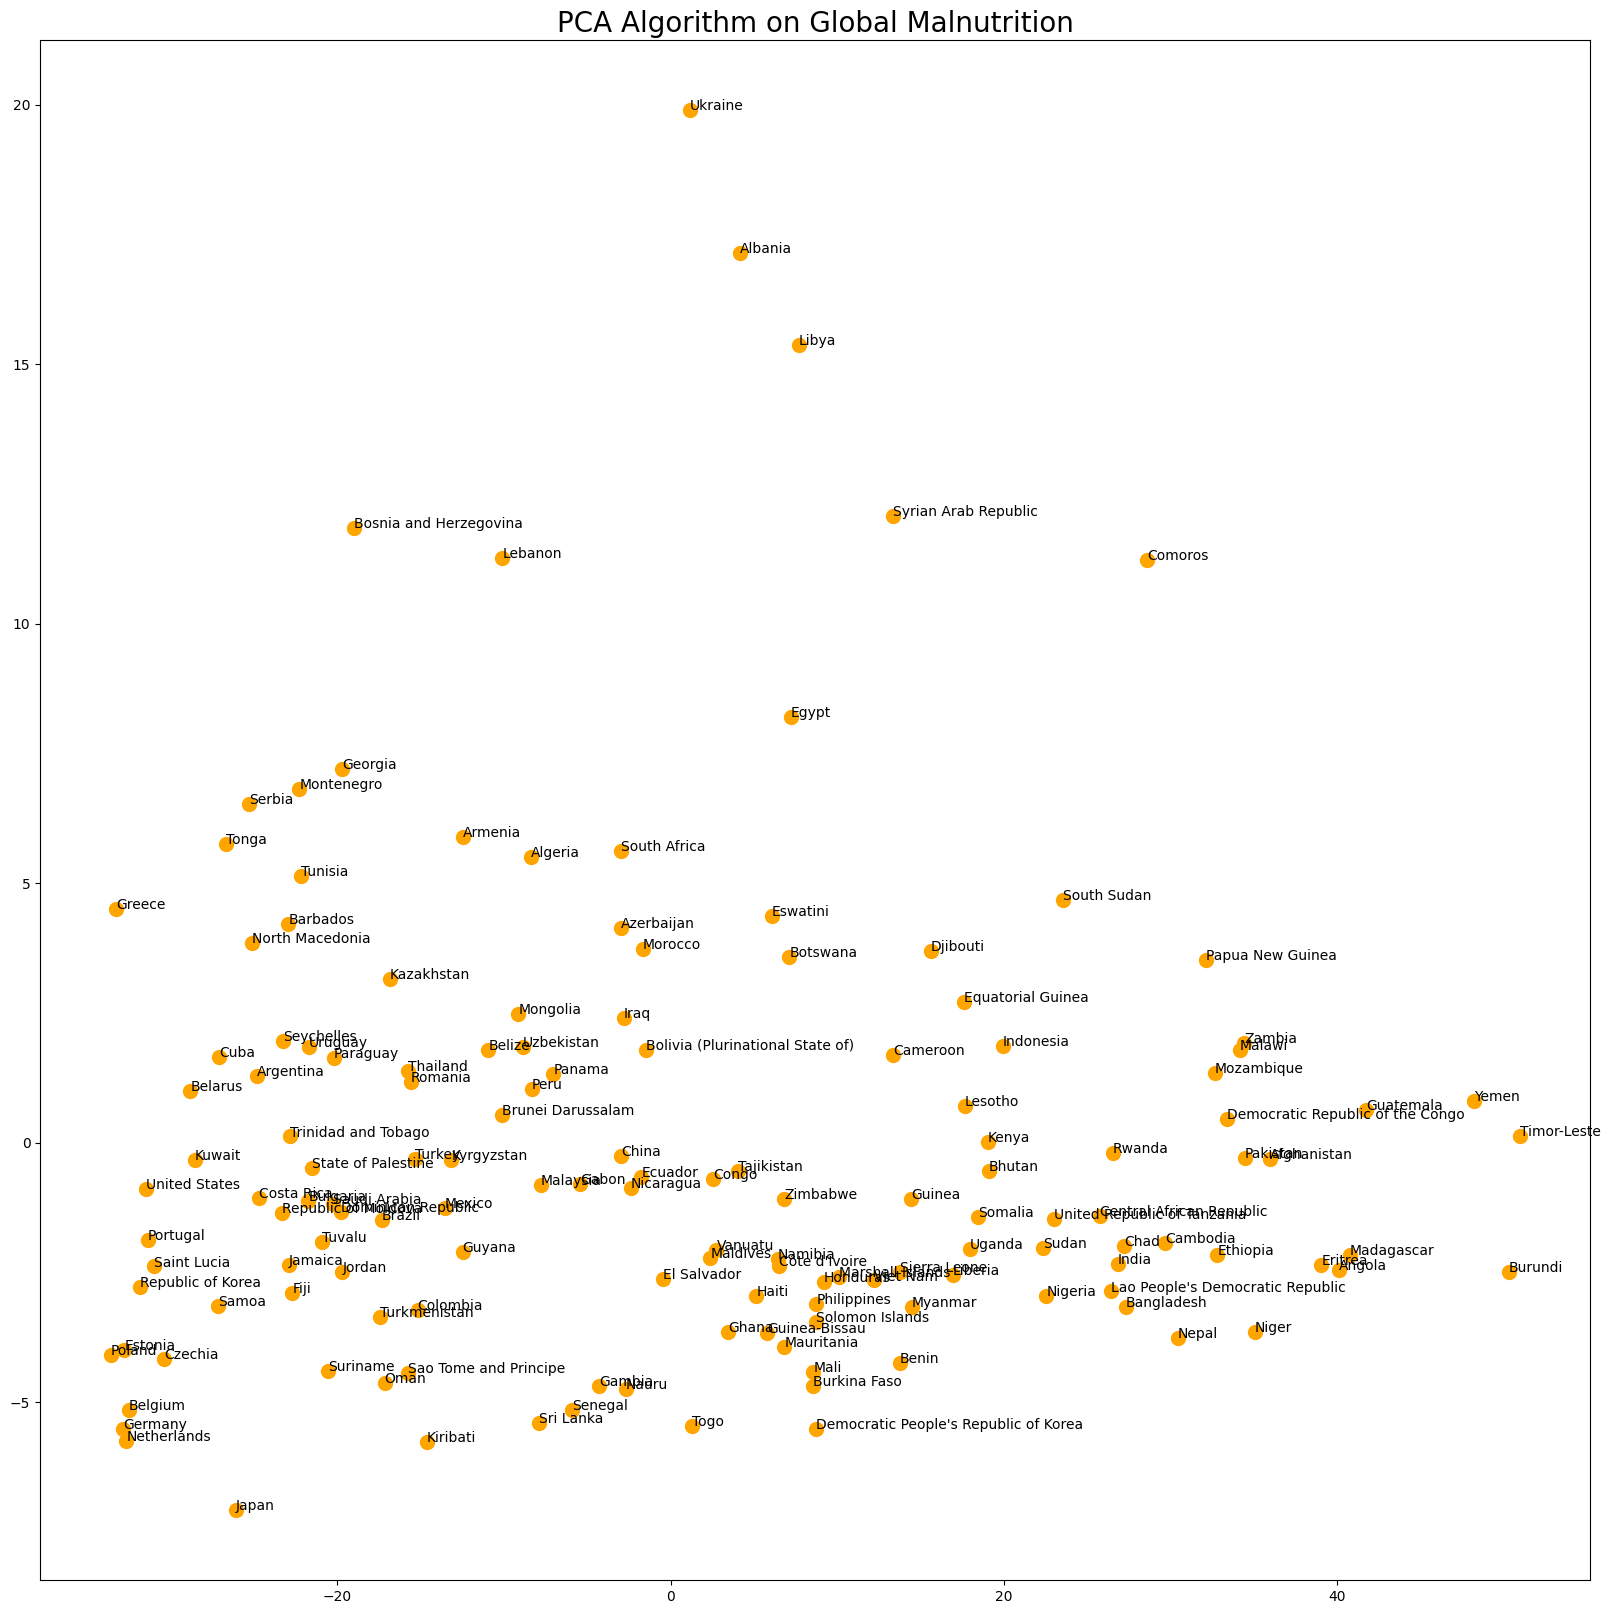

In [ ]:
fig = plt.figure(figsize=(20, 20))
Y_k = X.dot(VT[0:10, :].T)

plt.scatter(Y_k[:, 0], Y_k[:, 2], c = "orange", s = 100) # creating a scatterplot of countries
plt.title("PCA Algorithm on Global Malnutrition", fontsize=20)
for x, y, label in zip(Y_k[:, 0], Y_k[:, 2], countries):
    plt.annotate(label, xy=(x, y))


# Create trace
trace = go.Scatter(
    x=Y_k[:, 0],
    y=Y_k[:, 2],
    mode='markers',
    marker=dict(color='orange', size=10),
    text=countries,
)

# Create layout
layout = go.Layout(
    title="PCA Algorithm on Global Malnutrition",
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 3'),
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()


In this analysis, you can see that countries such as Ukraine, Albania, Libya, Bosnia and Herzgevonia, Lebanon, Syrian Arab Republic, Comoros and Egypt are visually separate from the rest of the countries.

In [ ]:
new_analysis = combined_df.groupby(["Country Name"], as_index = False).mean()

new_analysis["Year"] = new_analysis["Year"].astype(int)

# looking at the visually outlying countries
display(new_analysis[new_analysis["Country Name"].isin(["Ukraine", "Albania", "Libya", \
                                           "Bosnia and Herzgevonia", "Lebanon", \
                                           "Syrian Arab Republic", "Comoros", "Egypt"])])

# looking at the rest of the countries
display(new_analysis[~new_analysis["Country Name"].isin(["Ukraine", "Albania", "Libya", \
                                           "Bosnia and Herzgevonia", "Lebanon", \
                                           "Syrian Arab Republic", "Comoros", "Egypt"])][:5])

,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean
1,Albania,2007,23.625000,11.750000,38.550,25.150000
28,Comoros,2006,16.050000,18.100000,61.800,39.950000
39,Egypt,2001,14.742857,8.771429,41.600,25.185714
71,Lebanon,2000,18.750000,7.350000,24.500,15.925000
74,Libya,2005,21.800000,10.000000,42.300,26.150000
125,Syrian Arab Republic,2002,17.825000,15.525000,46.875,31.200000
137,Ukraine,2000,26.500000,12.000000,35.600,23.800000


,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean
0,Afghanistan,2011,4.666667,10.766667,69.833333,40.300000
2,Algeria,2003,12.828571,8.285714,25.728571,17.007143
3,Angola,2005,2.550000,7.750000,74.400000,41.075000
4,Argentina,2005,9.900000,1.400000,10.000000,5.700000
5,Armenia,2005,13.620000,5.540000,22.080000,13.810000


Observing the tables separately does not reveal anything as obvious as the 2-dimensional graph.

### 7. Continent Analysis

This section analyzes the groupings of countries within the continents. Although the make up of each continent (excluding Antarctica) vastly differs by the country's population, demographics, GDP etc., this grouping is a practical, high-level approach to visualize any continent-based trends

In [ ]:
country_rank_all=combined_df.groupby(by=['ISO Code','Country Name'],as_index=False).mean()
country_rank_all=country_rank_all.merge(country_count_all,how='inner',on='ISO Code')
country_rank_all=country_rank_all.sort_values(by='Mean', ascending = False)
country_rank_all["Year"]=country_rank_all["Year"].astype(int)
display(country_rank_all[:3])

,ISO Code,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean,Count
128,TLS,Timor-Leste,2007,3.65,20.725,83.300000,52.012500,4
143,YEM,Yemen,2003,4.50,20.200,80.666667,50.433333,6
6,BDI,Burundi,2012,2.08,6.900,84.900000,45.900000,5


In [ ]:
clean_all=country_rank_all.groupby(["Country Name", "Year"],as_index = False).mean()

clean_rank_all = iso_codes.merge(clean_all, on = "Country Name")

clean_rank_all = clean_rank_all.sort_values(by = ["Mean"], ascending = False)
display(clean_rank_all[:3])

,ISO Code,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean,Count
128,TLS,Timor-Leste,2007,3.65,20.725,83.300000,52.012500,4.0
143,YEM,Yemen,2003,4.50,20.200,80.666667,50.433333,6.0
6,BDI,Burundi,2012,2.08,6.900,84.900000,45.900000,5.0


In [ ]:
continent = pd.read_csv('//content/drive/MyDrive/Data/countryContinent.csv')

continent = continent[["country", "continent"]]

joined = clean_rank_all.merge(continent, left_on = "Country Name", right_on = "country")

joined = joined.drop(columns = "country")

In [ ]:
display(joined[:3])

,ISO Code,Country Name,Year,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean,Count,continent
0,TLS,Timor-Leste,2007,3.65,20.725,83.300000,52.012500,4.0,Asia
1,YEM,Yemen,2003,4.50,20.200,80.666667,50.433333,6.0,Asia
2,BDI,Burundi,2012,2.08,6.900,84.900000,45.900000,5.0,Africa


In [ ]:
by_continent = joined.groupby(["Year", "continent"], as_index = False).mean()

display(by_continent[:3])

,Year,continent,Overweight_percent,Waste_total_percent,Stunt_total_percent,Mean,Count
0,1997,Americas,6.633333,3.100000,17.133333,10.116667,3.0
1,1999,Asia,7.087500,4.262500,31.537500,17.900000,8.0
2,2000,Americas,4.750000,2.133333,34.316667,18.225000,6.0


### 8. ARIMA and Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

def predict_country_values(country_name, mean_type, data):
    # Filter data for the specified country
    country_data = data[data['ISO Code'] == country_name]

    # Train a linear regression model
    X = country_data[['Year']]

    if mean_type == 'Stunt_total_percent':
        y = country_data['Stunt_total_percent']
    elif mean_type == 'Waste_total_percent':
        y = country_data['Waste_total_percent']
    elif mean_type == 'Overweight_percent':
        y = country_data['Overweight_percent']
    else:  # Default to 'Mean'
        y = country_data['Mean']

    linear_model = LinearRegression()
    linear_model.fit(X, y)

    # Predict for the next 10 years using linear regression
    future_years = pd.DataFrame({'Year': range(country_data['Year'].max() + 1, country_data['Year'].max() + 11)})
    linear_predictions = linear_model.predict(future_years)

    # Train an ARIMA model
    arima_model = ARIMA(y, order=(5,1,0))  # Example ARIMA order, adjust as needed
    arima_fitted_model = arima_model.fit()

    # Predict for the next 10 years using ARIMA
    arima_predictions = arima_fitted_model.forecast(steps=10)

    return linear_predictions, arima_predictions, country_data


# Example usage for USA predicting Stunt_total_percent
linear_predictions_usa_stunt, arima_predictions_usa_stunt, usa_data_stunt = predict_country_values('AFG', 'Stunt_total_percent', combined_df)

# Example usage for USA predicting Waste_total_percent
linear_predictions_usa_waste, arima_predictions_usa_waste, usa_data_waste = predict_country_values('AFG', 'Waste_total_percent', combined_df)

# Example usage for USA predicting Overweight_percent
linear_predictions_usa_overweight, arima_predictions_usa_overweight, usa_data_overweight = predict_country_values('AFG', 'Overweight_percent', combined_df)

# Example usage for USA predicting Mean
linear_predictions_usa_mean, arima_predictions_usa_mean, usa_data_mean = predict_country_values('AFG', 'Mean', combined_df)

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Convert range object to list for x-axis values
linear_prediction_years = list(range(usa_data_stunt['Year'].max() + 1, usa_data_stunt['Year'].max() + 11))

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Stunt_total_percent", "Waste_total_percent", "Overweight_percent", "Mean"))

# Add traces for Stunt_total_percent
fig.add_trace(go.Scatter(x=usa_data_stunt['Year'], y=usa_data_stunt['Stunt_total_percent'], mode='lines', name='Actual Data', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=linear_predictions_usa_stunt, mode='lines', name='Linear Regression Predictions', line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=arima_predictions_usa_stunt, mode='lines', name='ARIMA Predictions', line=dict(color='red')), row=1, col=1)

# Add traces for Waste_total_percent
fig.add_trace(go.Scatter(x=usa_data_waste['Year'], y=usa_data_waste['Waste_total_percent'], mode='lines', name='Actual Data', line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=linear_predictions_usa_waste, mode='lines', name='Linear Regression Predictions', line=dict(color='green')), row=1, col=2)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=arima_predictions_usa_waste, mode='lines', name='ARIMA Predictions', line=dict(color='red')), row=1, col=2)

# Add traces for Overweight_percent
fig.add_trace(go.Scatter(x=usa_data_overweight['Year'], y=usa_data_overweight['Overweight_percent'], mode='lines', name='Actual Data', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=linear_predictions_usa_overweight, mode='lines', name='Linear Regression Predictions', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=arima_predictions_usa_overweight, mode='lines', name='ARIMA Predictions', line=dict(color='red')), row=2, col=1)

# Add traces for Mean
fig.add_trace(go.Scatter(x=usa_data_mean['Year'], y=usa_data_mean['Mean'], mode='lines', name='Actual Data', line=dict(color='blue')), row=2, col=2)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=linear_predictions_usa_mean, mode='lines', name='Linear Regression Predictions', line=dict(color='green')), row=2, col=2)
fig.add_trace(go.Scatter(x=linear_prediction_years, y=arima_predictions_usa_mean, mode='lines', name='ARIMA Predictions', line=dict(color='red')), row=2, col=2)

# Update layout
fig.update_layout(title='Predictions for Various Measures in USA', showlegend=True, width=1200, height=700)

# Show plot
fig.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index w

In [ ]:
import google.generativeai as genai
import os

genai.configure(api_key='')

model = genai.GenerativeModel('gemini-pro')

def generate_content_with_insights(document, df):
    combined_content = f"{document}\n\n{df.to_string()}"

    response = model.generate_content(combined_content)

    return response

# Call the function with the document and the DataFrame
document = 'Provide Insight about this data:'
response = generate_content_with_insights(document, usa_data_mean)

print(response.text)

**Overweight_percent**: The percentage of the population that is overweight or obese. This has decreased from 2004 to 2018. This is likely due to a combination of factors such as increased access to health information, improved nutrition, and increased physical activity.

**Waste_total_percent:** The percentage of the population that does not have access to basic sanitation. This has decreased from 2004 to 2018. This is likely due to a combination of factors such as increased investment in infrastructure and improved hygiene practices.

**Stunt_total_percent**: The percentage of the population that is stunted. Stunting is a condition that occurs when a child's growth is stunted due to malnutrition. This has decreased from 2004 to 2018. This is likely due to a combination of factors such as improved nutrition and increased access to healthcare.

**Mean**: The average of the three variables. This has decreased from 2004 to 2018. This is likely due to a combination of the factors mentione